<a href="https://colab.research.google.com/github/Obreintelly/Univariate_Bivariate_Analysis_in_R/blob/main/Univariate_Bivariate_Analysis_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**

**a). Study Question/Context**


> A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.


**b). Metric For Success**



> Analysis, Visualization and Findings on individuals most likely to click on adds


**c). Experimental Design**


> 1. Data Cleaning


> 2. Data Analysis


> 3. Recommendations & Conclusions















# **2. Installing Packages & Libraries**

In [120]:
#We will be working with data tables thus we install data.table package

install.packages("data.table")

#We will need a data manipulation package

#install.packages("dplyr")

#We will also need to get a package to support visualizations and dataframe 
#operations including data cleaning
install.packages("tidyverse")

#Installing GGPLOT2 to support visualization
install.packages("ggplot2")



# Install
install.packages("wesanderson")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [121]:



#Getting the packages

library(data.table)

#library(dplyr)

library(tidyverse)

library(ggplot2)

# Load
library(wesanderson)

# **Loading Dataset**

In [122]:
advert <- fread('http://bit.ly/IPAdvertisingData')

# **3. Previewing the Dataset**

In [123]:
#Checking Class of the Dataset
class(advert)

[1] "data.table" "data.frame"

We are working with a DataFrane

In [124]:
#Checking for the shape/size of the dataset

dim(advert)

[1] 1000   10

There are 10 Columns and 1000 rows in the dataset

In [125]:
#Checking the first 6 rows

head(advert)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [126]:
#Checking the last 6 rows
tail(advert)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [127]:
#Checking Columns in the dataset
colnames(advert)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [128]:
#Checking datatypes of the columns
str(advert)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [129]:
#Most of our columns are of numeric type
#Double-checking and identifying such columns

numeric <- unlist(lapply(advert, is.numeric))

In [130]:
#Displaying the Numeric Values in the Dataset
numeric

Daily Time Spent on Site                      Age              Area Income 
                    TRUE                     TRUE                     TRUE 
    Daily Internet Usage            Ad Topic Line                     City 
                    TRUE                    FALSE                    FALSE 
                    Male                  Country                Timestamp 
                    TRUE                    FALSE                    FALSE 
           Clicked on Ad 
                    TRUE

# **4. Data Cleaning**

In [131]:
#Checking for Missing Data in columns

colSums(is.na(advert))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

There are no missing entries in the dataset's columns

In [132]:
#Checking whether there are any duplicates in the dataset
advert[duplicated(advert),]

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>


There are no duplicated rows in the dataset

In [133]:
#Renaming Columns to make them precise

names(advert)[1] <- "Browse_time"

names(advert)[4] <- "Net_usage"

names(advert)[10] <- "Clicks"

names(advert)[5]  <- "Line"

names(advert)[3]  <- "Income"
names(advert)[7]  <- 'Gender'


In [134]:
#Preview Dataset
head(advert, 3)

Browse_time,Age,Income,Net_usage,Line,City,Gender,Country,Timestamp,Clicks
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [135]:
#Checking for Unique Values in Male Column to ensure alignment with expectations

distinct(select(advert, Gender ))

Gender
<int>
0
1


In [136]:
#Checking for unique values in the Clicks
distinct(select(advert, Clicks))

Clicks
<int>
0
1


In [137]:
#Checking for Unique Values in the City Column
distinct(select(advert, City))

City
<chr>
Wrightburgh
West Jodi
Davidton
West Terrifurt
South Manuel
Jamieberg
Brandonstad
Port Jefferybury
West Colin


In [172]:
#Gender and Clicks are erroneously classed as integers
#They are categorical features. Therefore we convert them
#to factors

advert$Gender <- factor(advert$Gender)

advert$Clicks <- factor(advert$Clicks)

#Checking Structure of Data
str(advert)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Browse_time: num  69 80.2 69.5 74.2 68.4 ...
 $ Age        : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Income     : num  61834 68442 59786 54806 73890 ...
 $ Net_usage  : num  256 194 236 246 226 ...
 $ Line       : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City       : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Gender     : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 2 1 2 2 2 ...
 $ Country    : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp  : POSIXct, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicks     : Factor w/ 2 levels "Yes","No": 1 1 1 1 1 1 1 2 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


# **Feature Engineering**

In [139]:
#Additional Feature Engineering to get the Gender factors to easily comprehensible
#types
#
levels(advert$Gender) <- c("Female", "Male")

#Carry out the same process in the Clicks Column

levels(advert$Clicks) <- c("Yes", "No")


In [207]:
distinct(select(advert, Country))

Country
<chr>
Tunisia
Nauru
San Marino
Italy
Iceland
Norway
Myanmar
Australia
Grenada


In [210]:
distinct(count(advert, "Country"))

"""Country""",n
<chr>,<int>
Country,1000


Grouping Countries by Continent

In [218]:
africa <- advert %>%
  mutate(africa = Country %in% c("Lesotho", "Mozambique", "Namibia", "Cape Verde", "Comoros", "Ethiopia", "Mali", "Djibouti", "Sudan", "Cameroon", "Egypt", "Burundi", "Ghana", "Tunisia"))

In [212]:
europe <- advert %>% 
  mutate(europe = Country %in% c("Slovakia (Slovak Republic)", "Andorra", "Denmark", "Slovenia", "Romania", "Isle of Man", "Greece", "Monaco", "Russian Federation", "Spain", "Bosnia and Herzegovina", "Norway", "Iceland", "Italy", "San Marino"))

In [213]:
asia <- advert %>% 
  mutate(asia = Country %in% c("Armenia", "Kiribati", "Marshall Islands", "India", "Nepal", "Vanuatu", "Macao", "Tuvalu" , "Tokelau" , "Korea", "British Indian Ocean Territory (Chagos Archipelago)", "Australia", "Myanmar","Nauru"))

In [214]:
america <- advert %>% 
  mutate(america = Country %in% c("South Georgia and the South Sandwich Islands", "Uruguay", "Cayman Islands", "United States Virgin Islands", "Aruba", "Peru", "British Virgin Islands", "Bouvet Island (Bouvetoya)" , "Barbados", "Grenada" ))

In [215]:
mid_east <- advert %>%
  mutate(mid_east = Country %in% c("Syrian Arab Republic","Yemen", "Afghanistan","Palestinian Territory" , "Qatar"  ))

# **Outlier Detection**

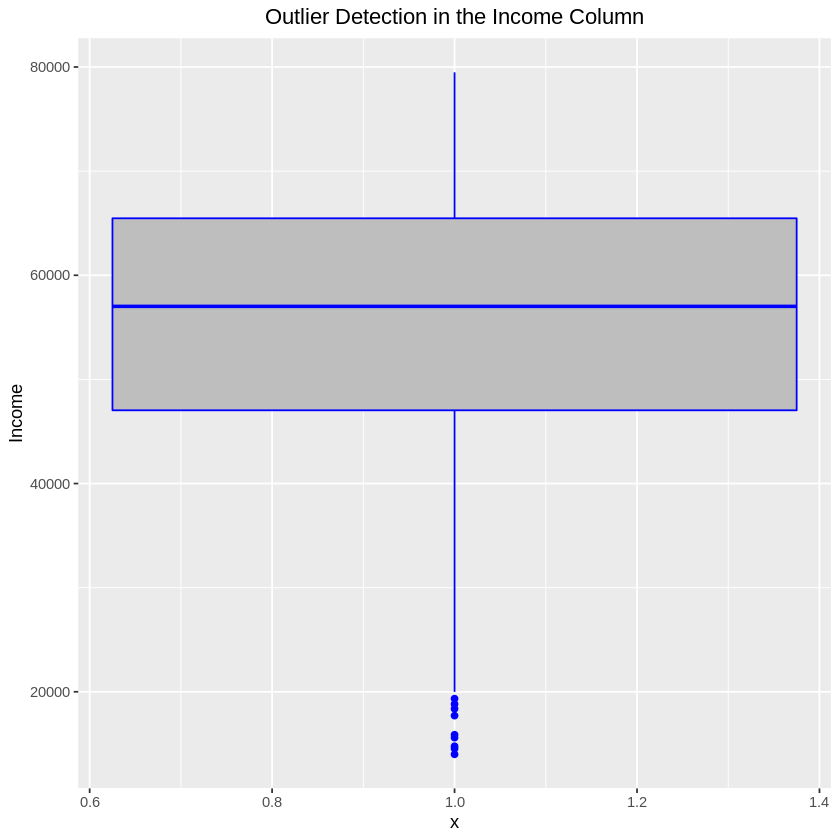

In [190]:
#Checking for Outliers in the Income Column
advert %>%
  ggplot(aes(x= 1, y=Income)) +
  geom_boxplot(fill = "grey", color= 'blue') +
  ggtitle("Outlier Detection in the Income Column") + theme(plot.title = element_text(hjust = 0.5))

We have about 8 outliers in the dataset that represent actual income levels of individuals. We will not drop them from the dataset as they are actual datapoints. 

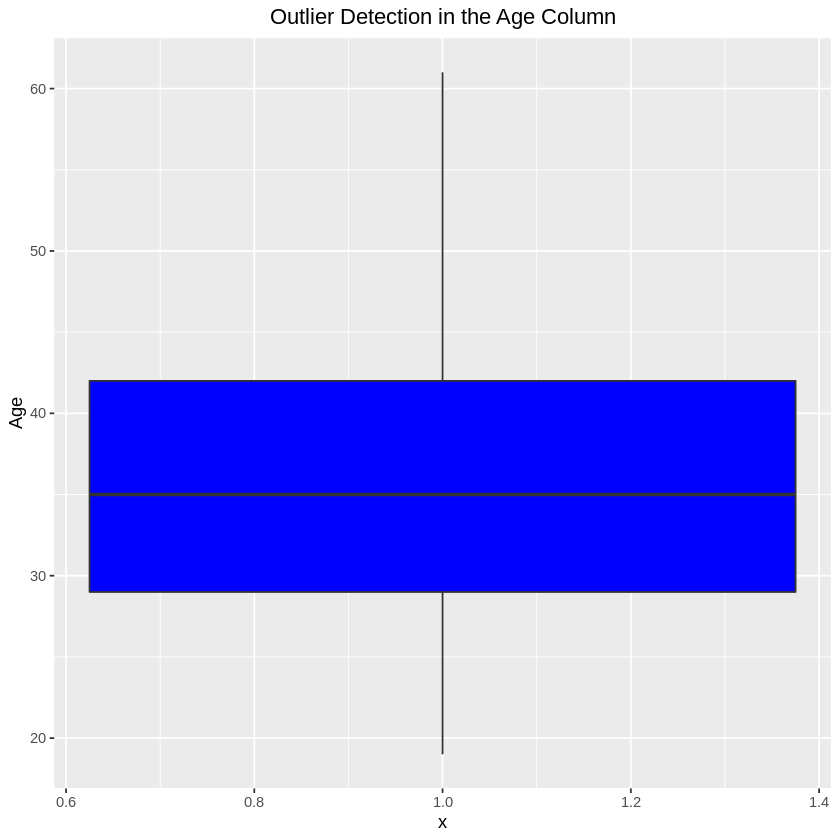

In [191]:
advert %>%
  ggplot(aes(x= 1, y=Age)) +
  geom_boxplot(fill= 'blue') +
  ggtitle("Outlier Detection in the Age Column") + theme(plot.title = element_text(hjust = 0.5))


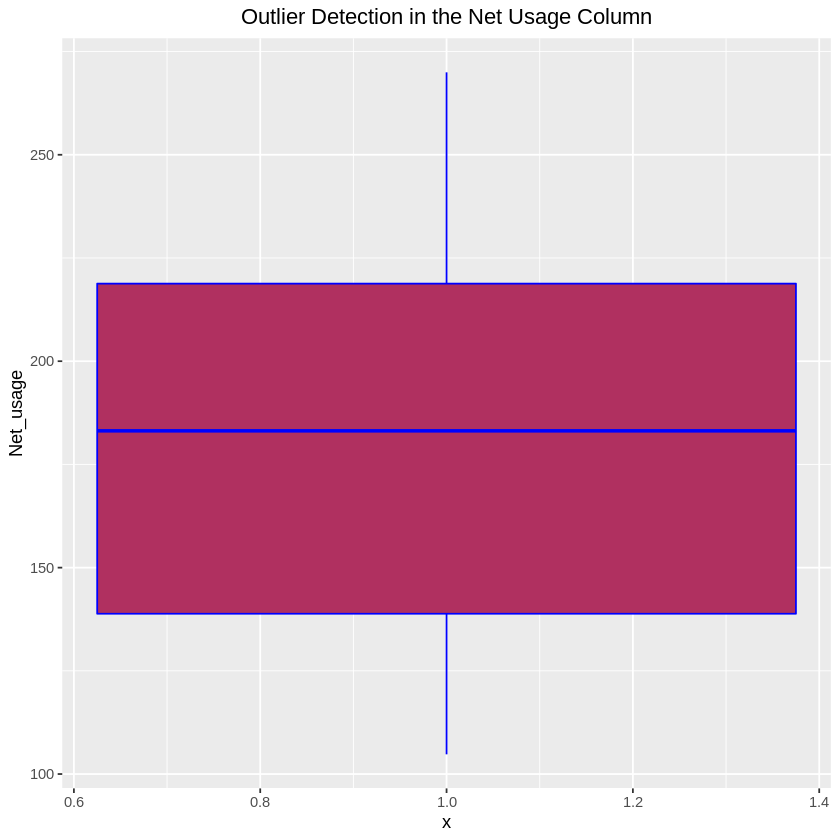

In [206]:
advert %>%
  ggplot(aes(x= 1, y= Net_usage)) +
  geom_boxplot(fill="maroon", color="blue") +
  ggtitle("Outlier Detection in the Net Usage Column") + theme(plot.title = element_text(hjust = 0.5))


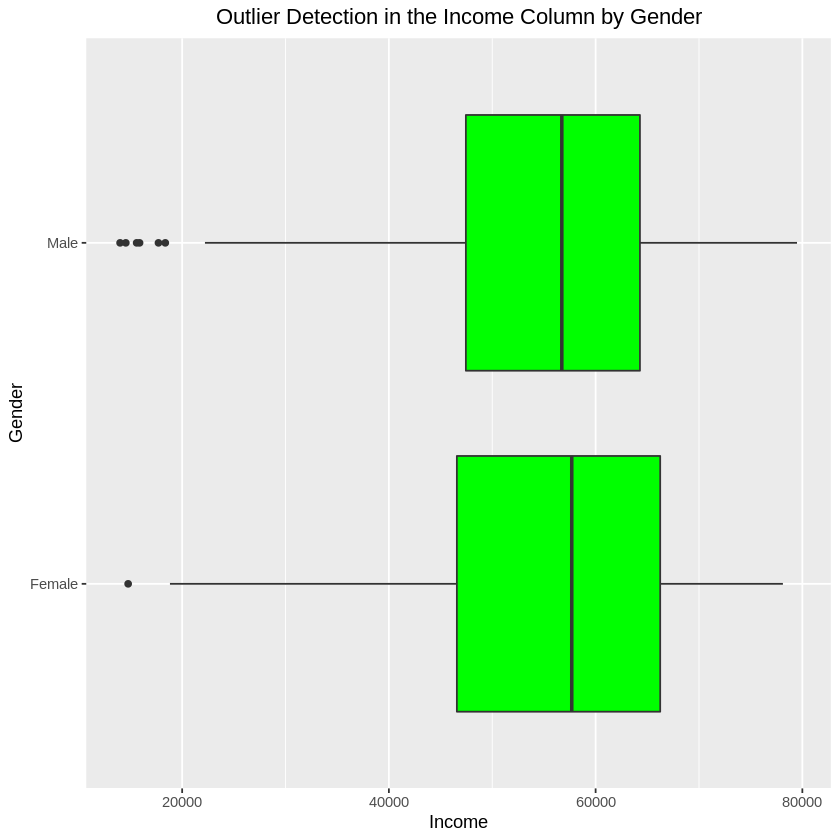

In [203]:
advert %>%
  ggplot(aes(x= Income, y= Gender)) +
  geom_boxplot(fill= "green") +
  ggtitle("Outlier Detection in the Income Column by Gender") + theme(plot.title = element_text(hjust = 0.5))

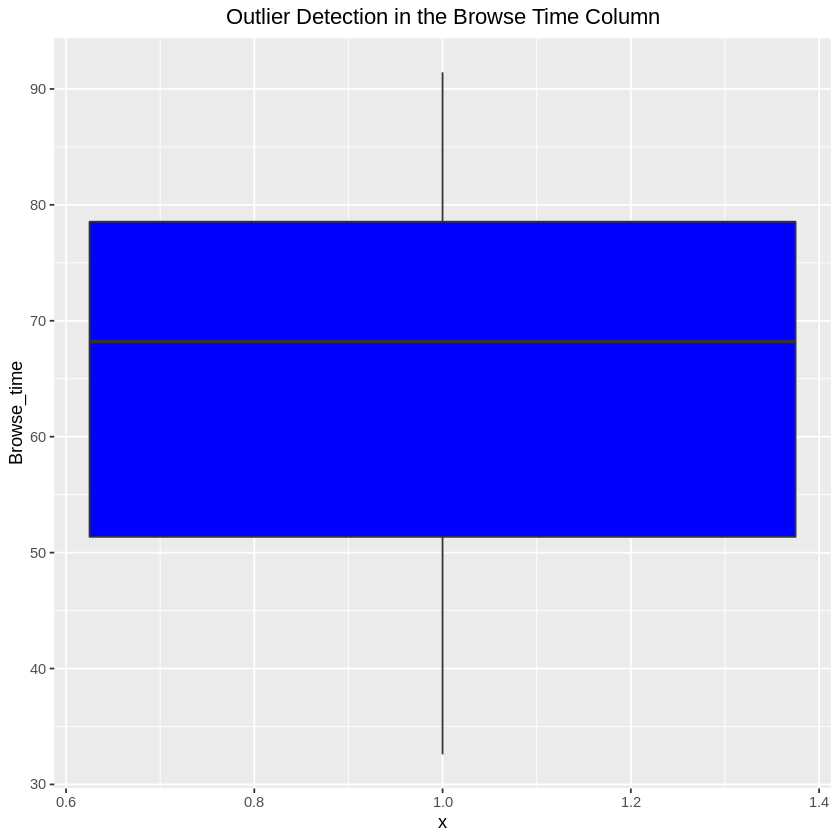

In [204]:
advert %>%
  ggplot(aes(x= 1, y=Browse_time)) +
  geom_boxplot(fill= 'blue') +
  ggtitle("Outlier Detection in the Browse Time Column") + theme(plot.title = element_text(hjust = 0.5))

With the exception of the Individual Income Level which had circa eight outliers on the higher side, the rest of the columns had no outliers. 

Given that the outlier values are valid data points, we make the decision to retain them in the dataset.

# **6. Exploratory Data Analysis**

# **Univariate Analysis**

In [173]:
summary(advert)

  Browse_time         Age            Income        Net_usage    
 Min.   :32.60   Min.   :19.00   Min.   :13996   Min.   :104.8  
 1st Qu.:51.36   1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8  
 Median :68.22   Median :35.00   Median :57012   Median :183.1  
 Mean   :65.00   Mean   :36.01   Mean   :55000   Mean   :180.0  
 3rd Qu.:78.55   3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8  
 Max.   :91.43   Max.   :61.00   Max.   :79485   Max.   :270.0  
     Line               City              Gender      Country         
 Length:1000        Length:1000        Female:519   Length:1000       
 Class :character   Class :character   Male  :481   Class :character  
 Mode  :character   Mode  :character                Mode  :character  
                                                                      
                                                                      
                                                                      
   Timestamp                   Clicks   
 Min.  

The average daily Browse_time was 65 while the maximum time spent online was 91 . The minimum browse time was 33.


The minimum and maximum age was 19 and 61 respectively.The average age was 36 years. 

Most individuals earn around 55,000. The least and highest incomes were 13996 and 79485 respectively.  


The minimum and maximum internet Usage was 104 and 270 respectively. The average internet use was 180

In [142]:
# Computing Mode of Numerical Columns
#We need to leverage the power of functions to do this

#getmode <- function(v) {
#  uniqv <- unique(v)
#  uniqv[which.max(tabulate(match(v, uniqv)))]
#}

#getmode(Age)

In [143]:
#Individuals below the mean Age
below.mean <- filter(advert, Age<36.01)


In [145]:
#ggplot(advert, aez(x"", y=Gender, fill= category)) + geom_bar(stat = )

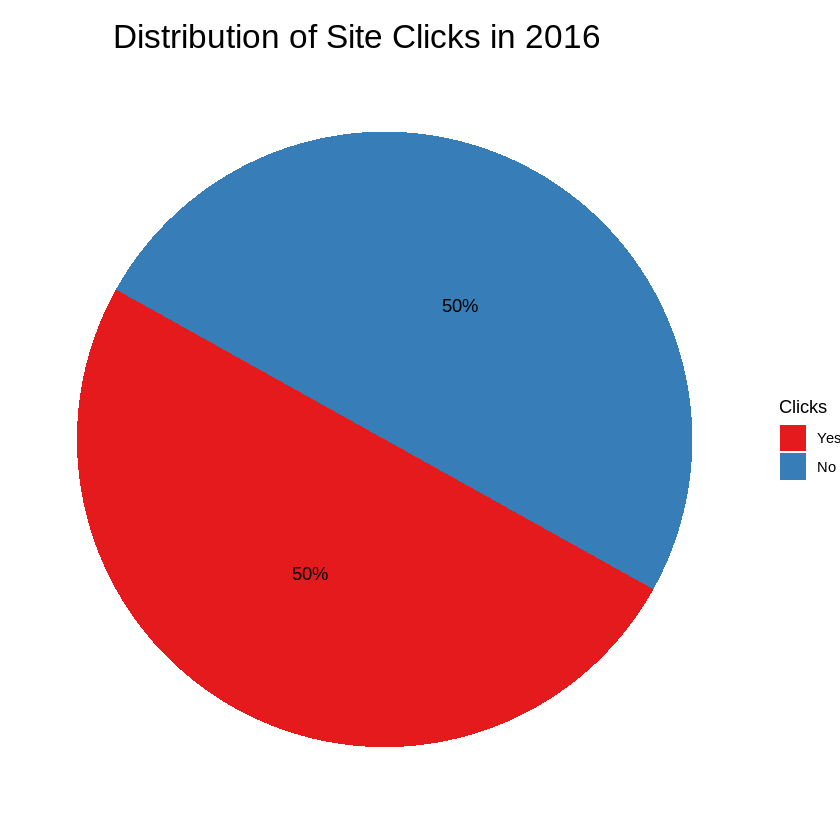

In [154]:
click_perc <- advert %>%
  filter(Clicks != "NA") %>%
  group_by(Clicks) %>%
  count() %>%
  ungroup() %>%
  arrange(desc(Clicks)) %>%
  mutate( percentage = round(n/sum(n), 1)*100, lab.pos = cumsum(percentage)- 0.5 * percentage)
ggplot(click_perc, aes(x = "", y= percentage, fill = Clicks)) +
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Set1") + labs(title= "Distribution of Site Clicks in 2016") + 
  theme(plot.title = element_text(hjust = 0.4, size = 20))

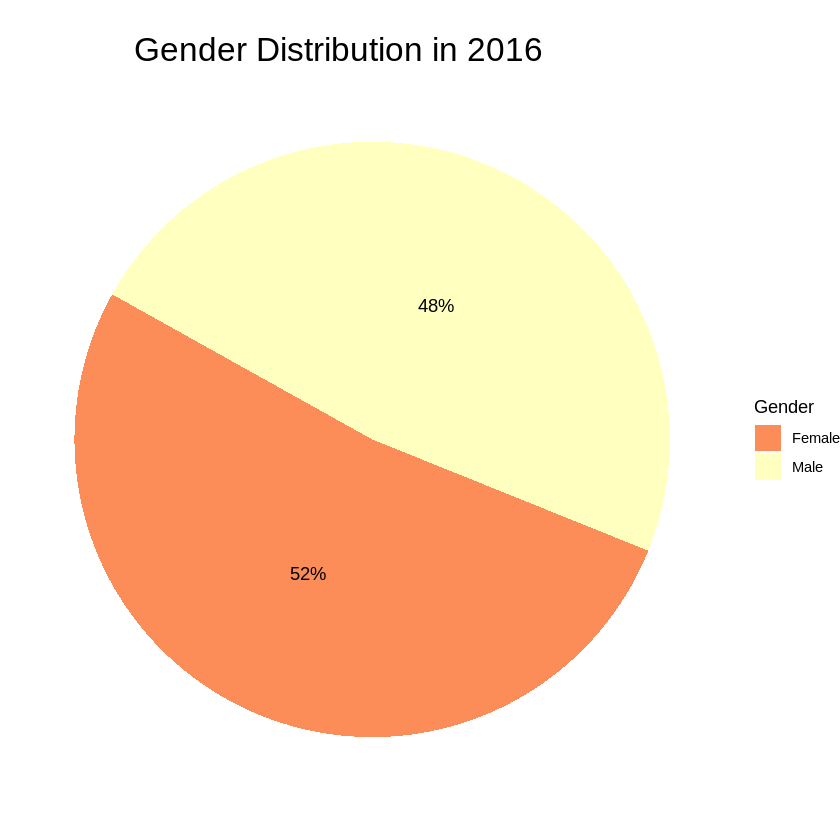

In [153]:
#Plotting Pie Chart for Gender Distribution

#Filtering the gender df 
pie_gender <- advert %>%
  filter(Gender != "NA") %>%
  group_by(Gender) %>%
  count() %>%
  ungroup() %>%
  arrange(desc(Gender)) %>%
  mutate( percentage = round(n/sum(n), 2)*100, lab.pos = cumsum(percentage)- 0.5 * percentage)
ggplot(pie_gender, aes(x = "", y= percentage, fill = Gender)) +
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Spectral") + labs(title= "Gender Distribution in 2016") + 
  theme(plot.title = element_text(hjust = 0.4, size = 20))


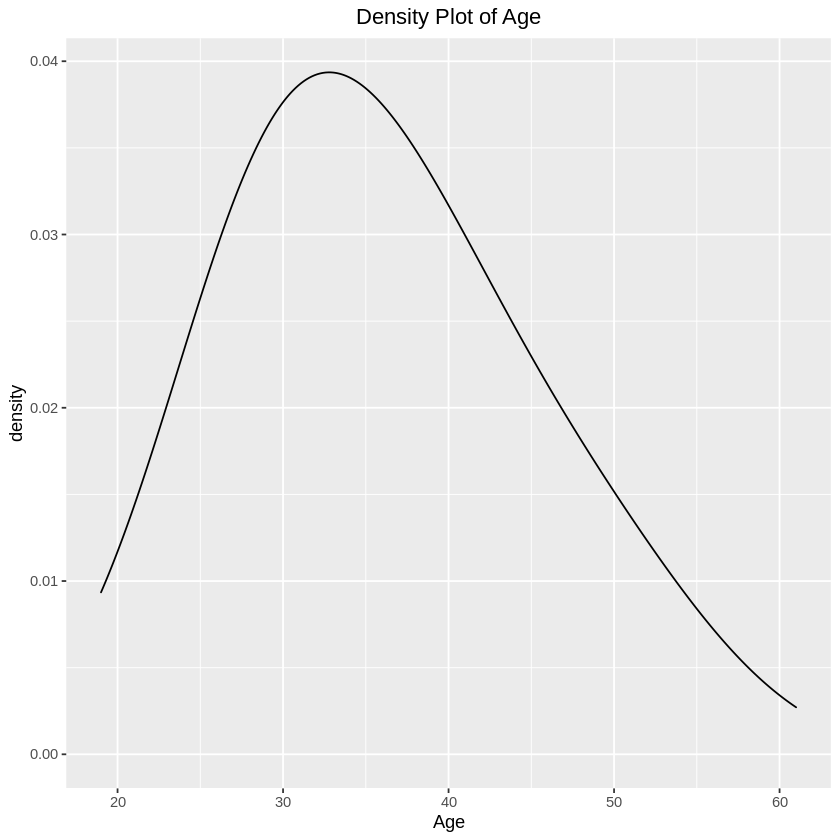

In [155]:
#Density Plot Distribution of the Age Column
ggplot(advert, aes(x= Age)) + 
geom_density(bw = 5) + 
ggtitle("Density Plot of Age") + theme(plot.title = element_text(hjust = 0.5))

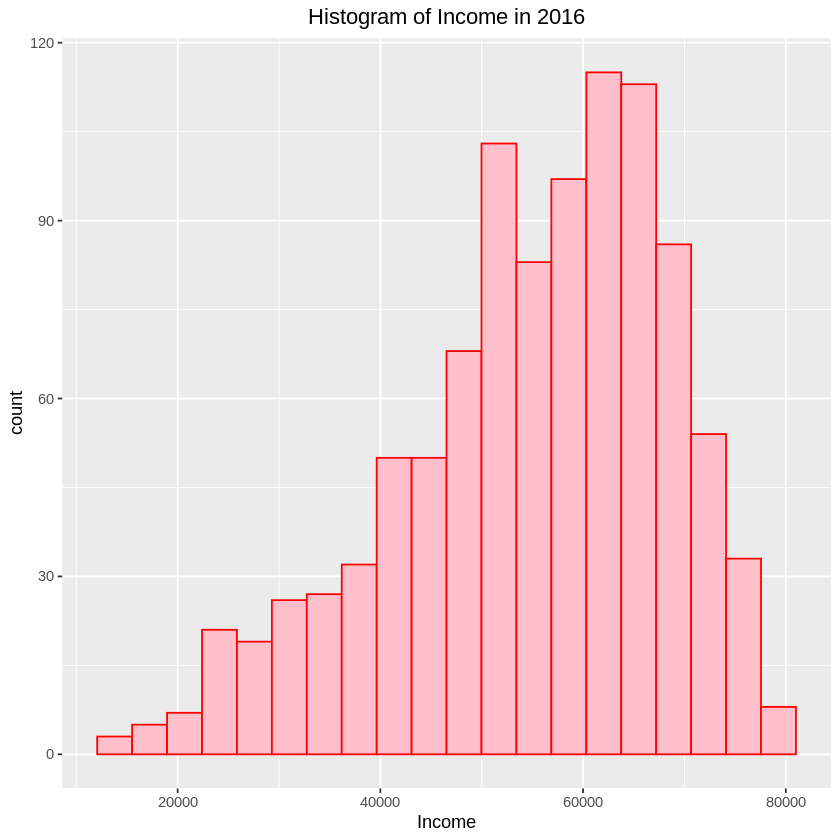

In [156]:
#Histogram of Income
pl <- ggplot(advert, aes(x = Income))

p2 <- (pl + geom_histogram( bins = 20, color='red', fill = 'pink'))

print(p2 + ggtitle("Histogram of Income in 2016") + theme(plot.title = element_text(hjust = 0.5)) )



In [219]:
africa %>%
  group_by(africa) %>%
  summarize(mean(Browse_time), median(Browse_time))

africa,mean(Browse_time),median(Browse_time)
<lgl>,<dbl>,<dbl>
FALSE,64.91355,67.94
TRUE,66.75723,74.07


In [239]:
print(skewness(africa$Age))

ERROR: ignored

In [220]:
america %>%
  group_by(america) %>%
  summarize(mean(Browse_time), median(Browse_time))

america,mean(Browse_time),median(Browse_time)
<lgl>,<dbl>,<dbl>
FALSE,64.90507,67.880
TRUE,67.17000,73.375


In [234]:
range <- max(america$Age) - min(america$Age)
cat("Age Range is :", range, "\n")
cat("Age Inter-quartile Range is :" , IQR(america$Age), "\n")
cat("Age Variance is :", var(america$Age), "\n")
cat("Age Standard Deviation is :", sd(america$Age), "\n")

Age Range is : 42 
Age Inter-quartile Range is : 13 
Age Variance is : 77.18611 
Age Standard Deviation is : 8.785562 


In [221]:
asia %>%
  group_by(asia) %>%
  summarize(mean(Browse_time), median(Browse_time))

asia,mean(Browse_time),median(Browse_time)
<lgl>,<dbl>,<dbl>
FALSE,65.00197,68.41
TRUE,64.96592,67.39


In [222]:
europe %>%
  group_by(europe) %>%
  summarize(mean(Browse_time), median(Browse_time))

europe,mean(Browse_time),median(Browse_time)
<lgl>,<dbl>,<dbl>
FALSE,64.85659,67.94
TRUE,67.78735,73.21


In [229]:
head(europe, 10)

Browse_time,Age,Income,Net_usage,Line,City,Gender,Country,Timestamp,Clicks,europe
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<dttm>,<fct>,<lgl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,Yes,FALSE
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,Yes,FALSE
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,Yes,TRUE
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,Yes,TRUE
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,Yes,TRUE
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,Male,Norway,2016-05-19 14:30:17,Yes,TRUE
88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,Female,Myanmar,2016-01-28 20:59:32,Yes,FALSE
66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,Male,Australia,2016-03-07 01:40:15,No,FALSE
74.53,30,68862.00,221.51,Configurable coherent function,West Colin,Male,Grenada,2016-04-18 09:33:42,Yes,FALSE


# **Bivariate Analysis**

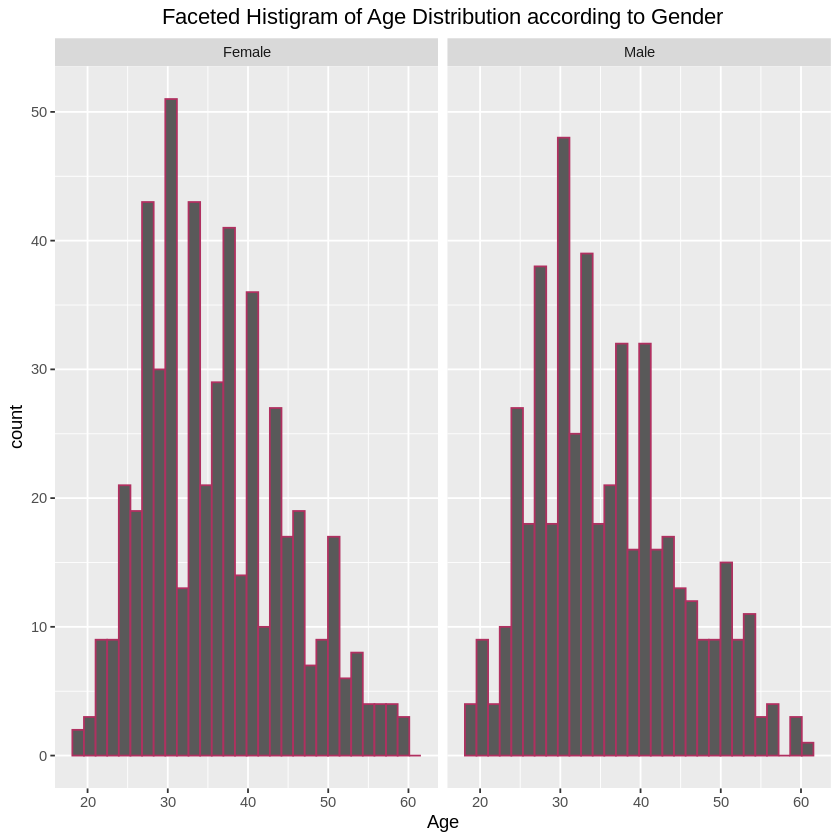

In [157]:
#Using Gaceted Histograms, we investigate the distribution of Age along
#Gender Lines
ggplot(advert, aes(x= Age)) +
geom_histogram(bins = 30, color = "maroon") + 
facet_wrap(~Gender) +
ggtitle("Faceted Histigram of Age Distribution according to Gender") + theme(plot.title = element_text(hjust = 0.5))

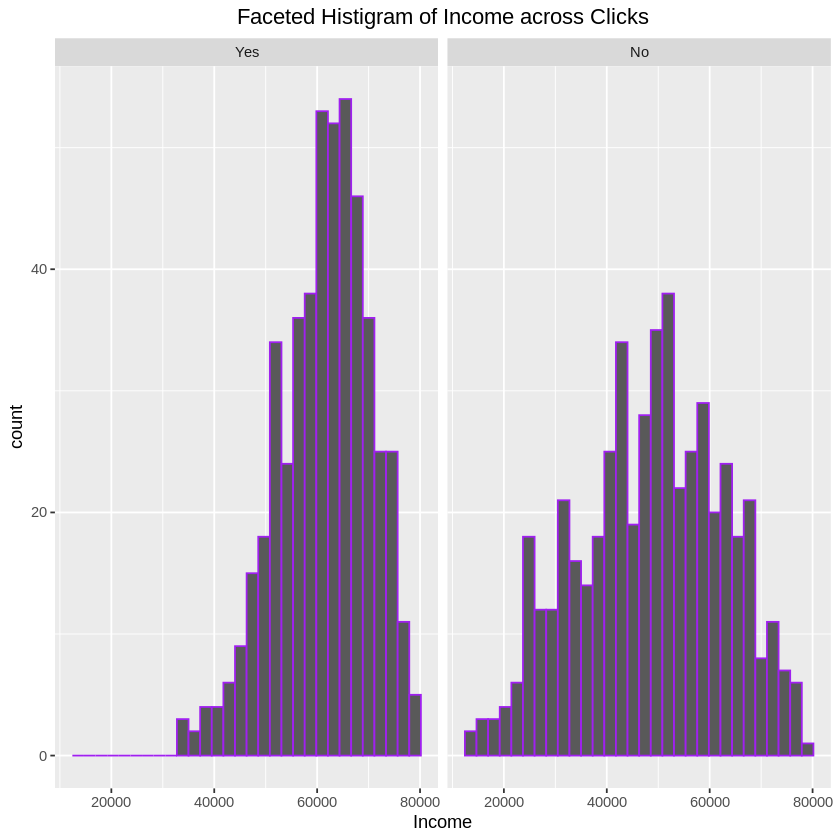

In [158]:
#Distibution of Income along Click Lens
ggplot(advert, aes(x= Income)) +
geom_histogram(bins = 30, color = "purple") + 
facet_wrap(~Clicks) +
ggtitle("Faceted Histigram of Income across Clicks") + theme(plot.title = element_text(hjust = 0.5))

In [159]:
head(advert)

Browse_time,Age,Income,Net_usage,Line,City,Gender,Country,Timestamp,Clicks
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<dttm>,<fct>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,Yes
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,Yes
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,Yes
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,Yes
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,Yes
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,Male,Norway,2016-05-19 14:30:17,Yes


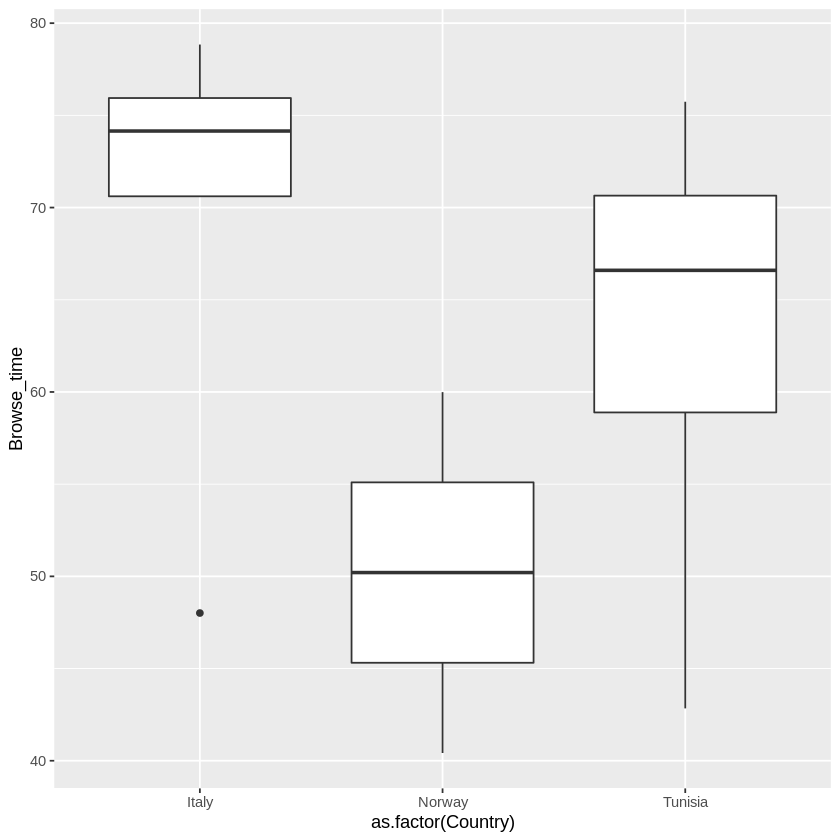

In [160]:
country <- filter(advert, Country %in% c("Tunisia", "Italy", "Norway"))

ggplot(country, aes(x = as.factor(Country), y= Browse_time)) +
geom_boxplot()



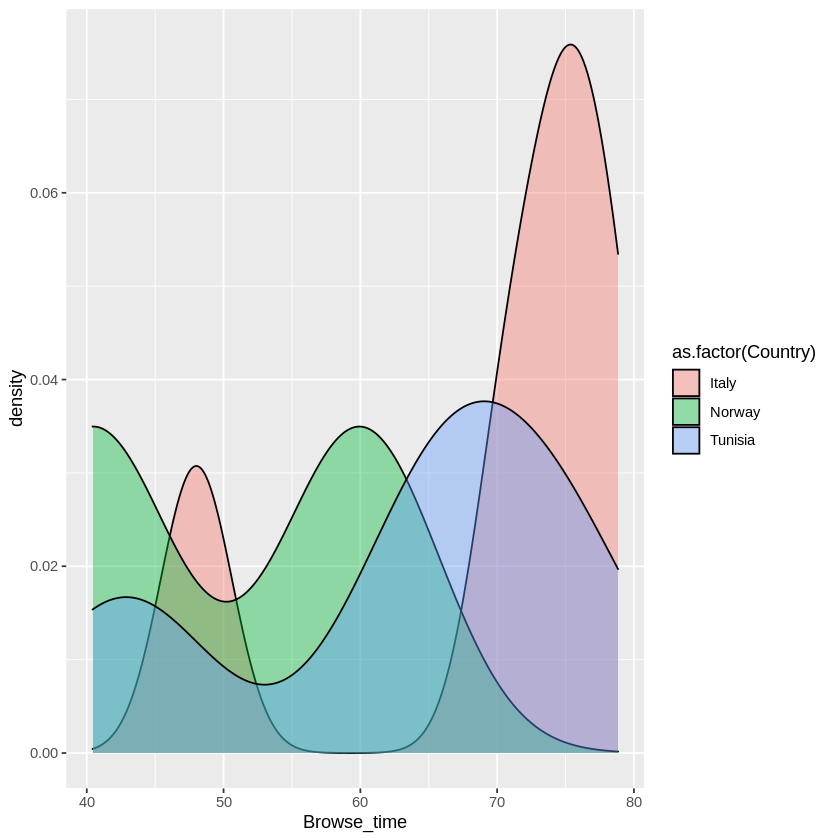

In [161]:
ggplot(country, aes(x= Browse_time, fill = as.factor(Country))) +
geom_density(alpha= .4)

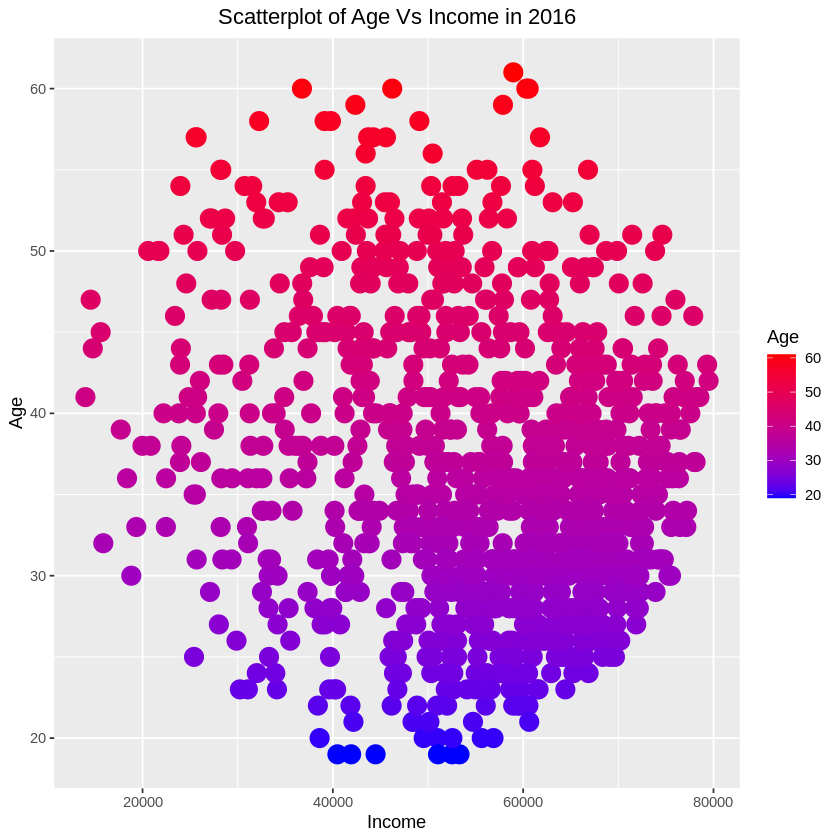

In [162]:
#b1 <- ggplot(advert, aes(x=Age, y=Income))

#print(b1 + geom_point())
b1 <- ggplot(advert, aes(x=Income, y=Age))

b2 <- b1 + geom_point(aes(color=Age), size=5) + scale_color_gradient(low='blue', high = 'red')
print(b2 + ggtitle("Scatterplot of Age Vs Income in 2016") + theme(plot.title = element_text(hjust = 0.5)))

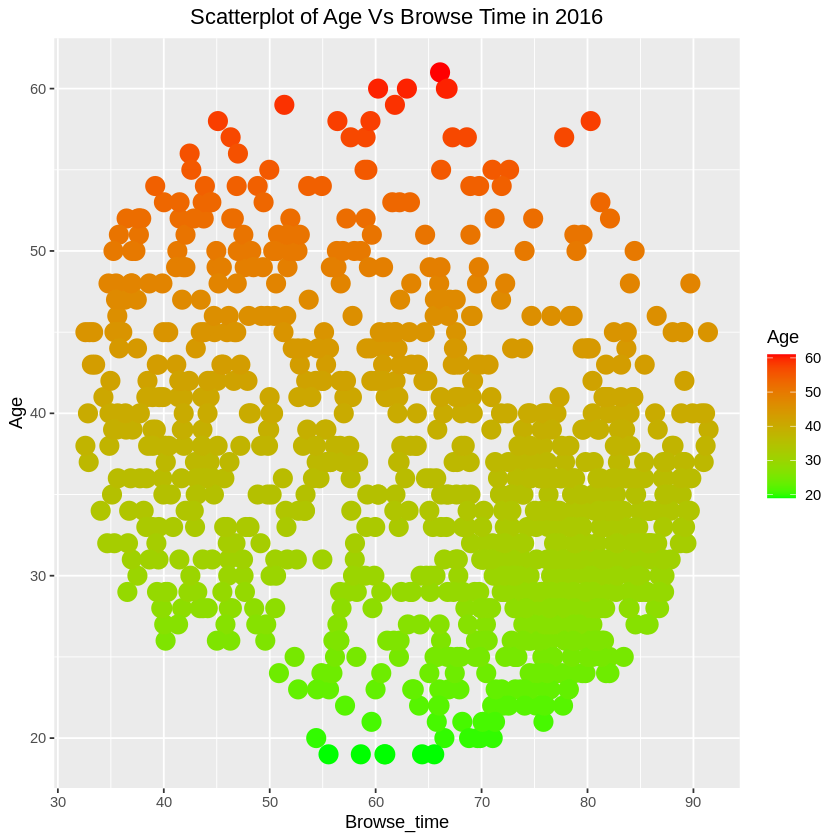

In [163]:
b2 <- ggplot(advert, aes(x=Browse_time, y=Age))

b3 <- b2 + geom_point(aes(color=Age), size=5) + scale_color_gradient(low='green', high = 'red')
print(b3 + ggtitle("Scatterplot of Age Vs Browse Time in 2016") + theme(plot.title = element_text(hjust = 0.5)))

From the above plot, individuals between ages 25 and 45 spend the most amount of time online. 

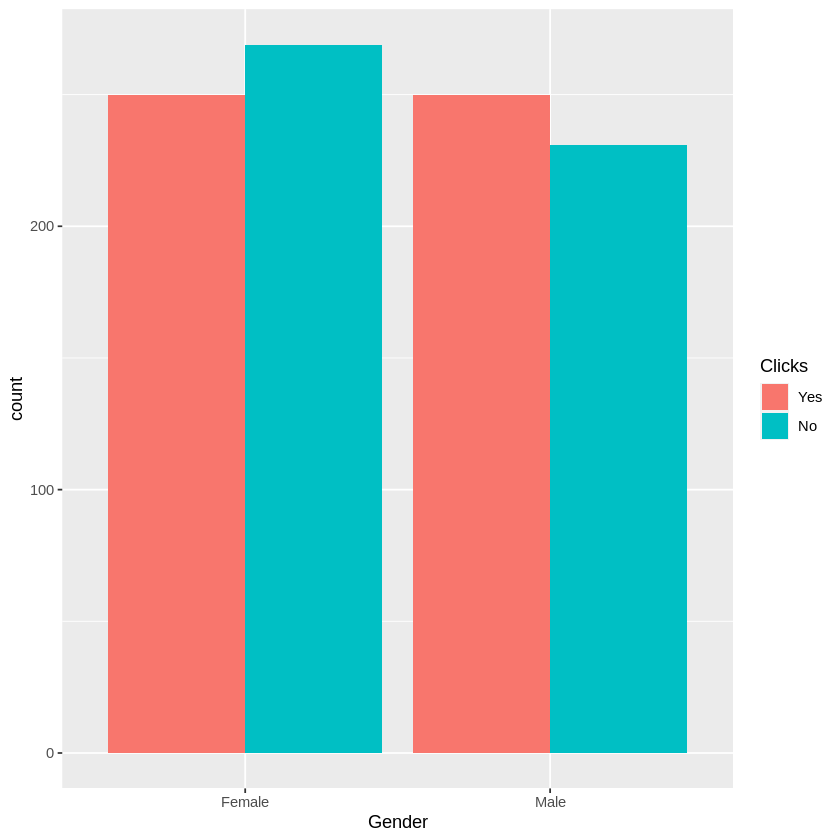

In [165]:
# Creating a side-by-side barchart of Gender by Clicks
ggplot(advert, aes(x = Gender, fill = Clicks)) + 
  geom_bar(position = "dodge")



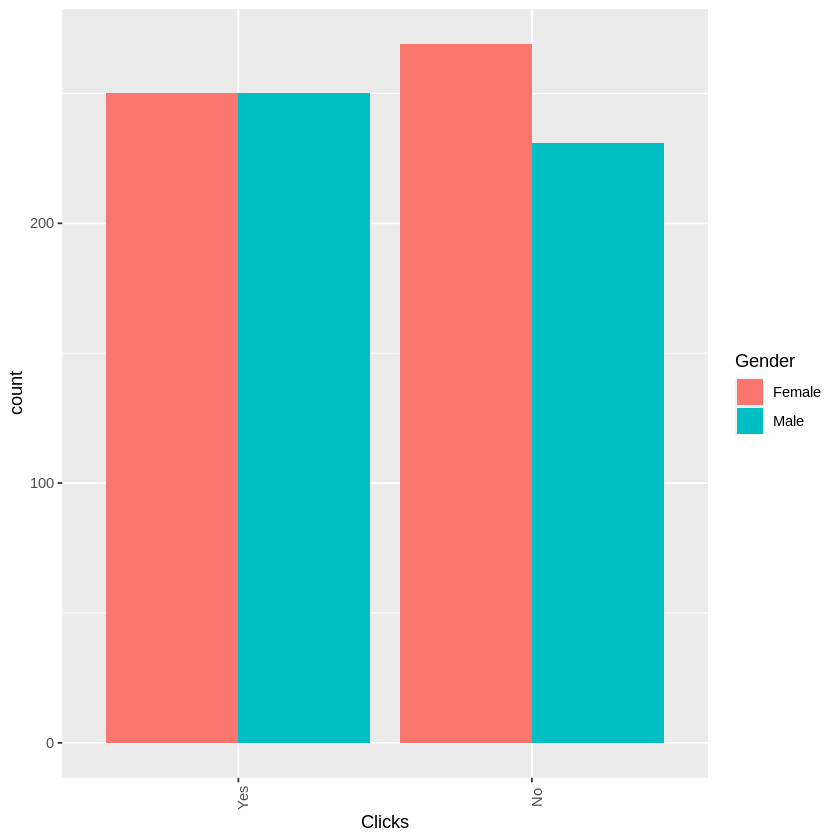

In [166]:
# Creating a side-by-side barchart of Clicks by gender
ggplot(advert, aes(x = Clicks, fill = Gender)) + 
  geom_bar(position= "dodge") +
  theme(axis.text.x = element_text(angle = 90))

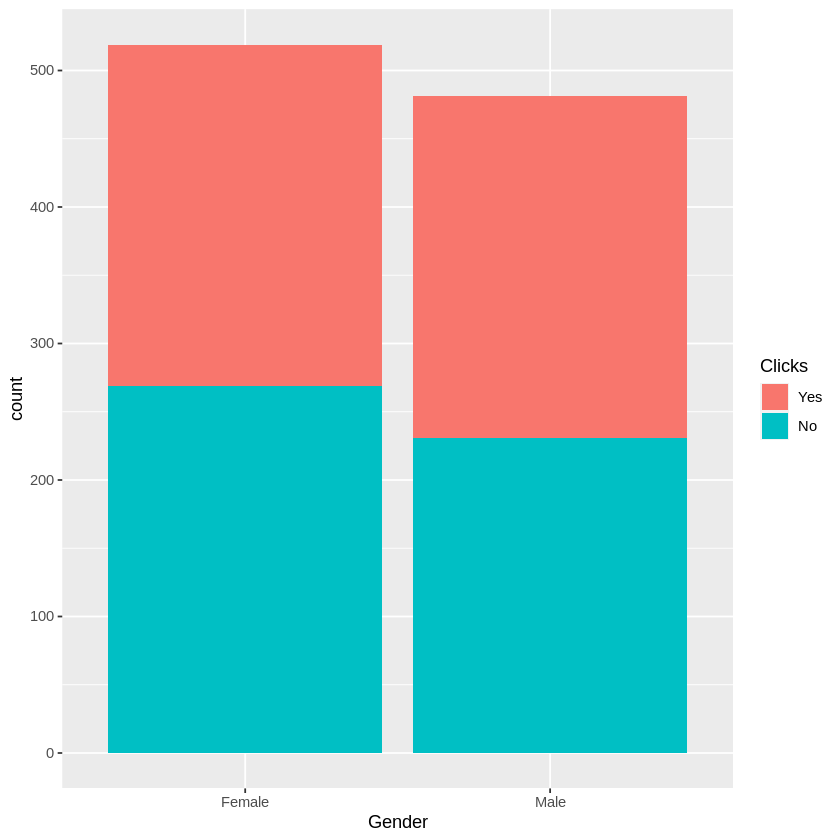

In [167]:
# Plot of gender by Clicks
ggplot(advert, aes(x = Gender, fill = Clicks)) +
  geom_bar()
  

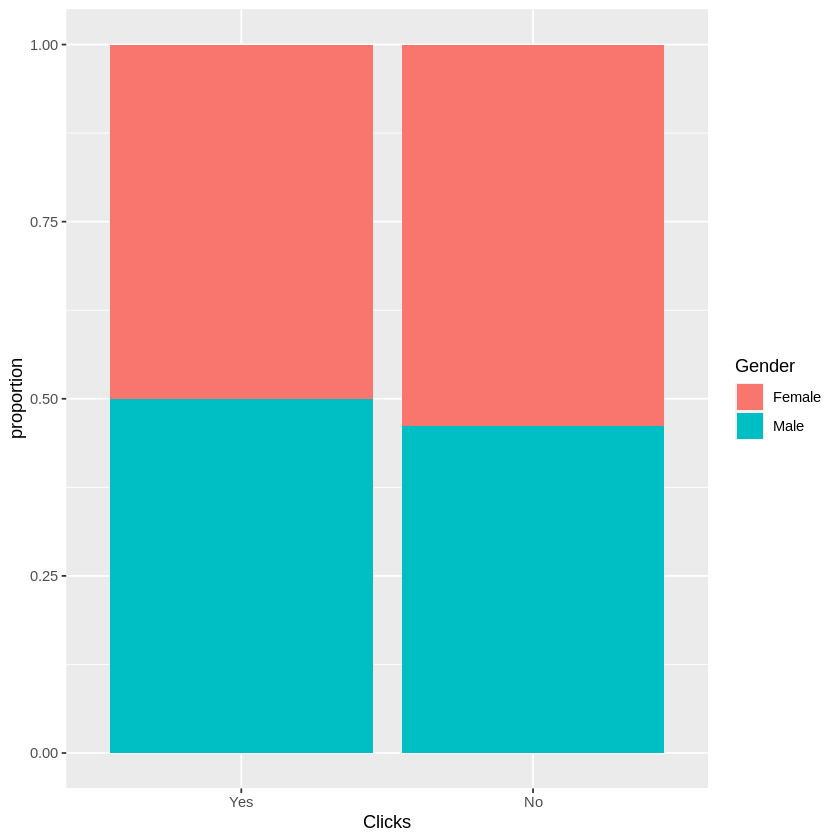

In [168]:
# Plot proportion of gender, conditional on Clicks
ggplot(advert, aes(x = Clicks, fill = Gender)) + 
  geom_bar(position = "fill") +
  ylab("proportion")